# Машинное обучение, ФКН ВШЭ

# Практическое задание 4

### Общая информация

Дата выдачи: 28 октября 2019

Мягкий дедлайн: 7:59MSK 11 ноября 2019 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 13 ноября 2019.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf = LinearSVC(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve

In [ ]:
y_df = clf.decision_function(X_test)

ROC AUC = 0.93


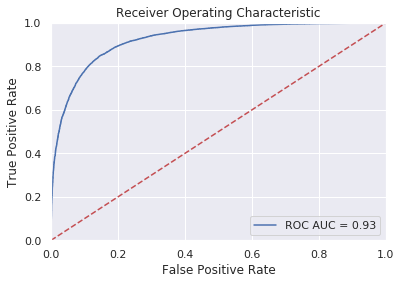

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_df)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('ROC AUC = %0.2f' % roc_auc)

PR AUC = 0.92


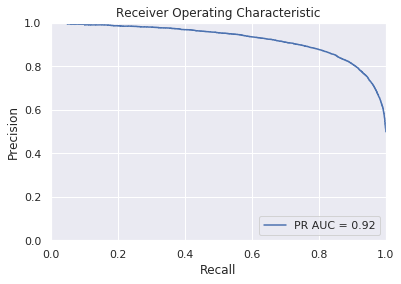

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,y_df)
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.2f' % pr_auc)

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

In [ ]:
from sklearn.svm import SVC

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X, y)

Text(0.5, 0, 'Feature 1')

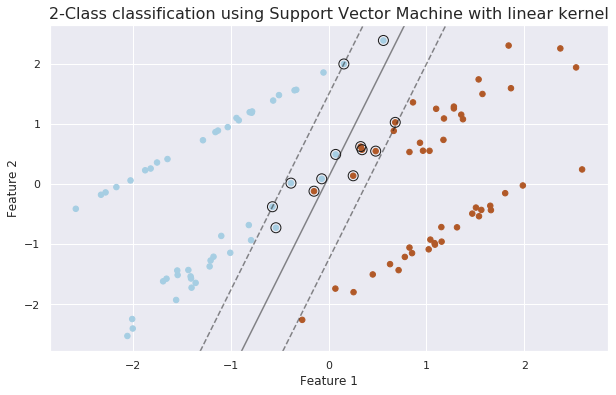

In [ ]:
figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('2-Class classification using Support Vector Machine with linear kernel', fontsize=16)
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

$Ответ:$ Функция решений для SVM выдаёт не веротяность класса, а удалённость от разделяющей гиперплоскости.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # l + r
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) #np.mean
    plt.plot(bin_middle_points, bin_real_ratios)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=2, n_informative=2, n_redundant=0,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict_proba(X_test)

clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

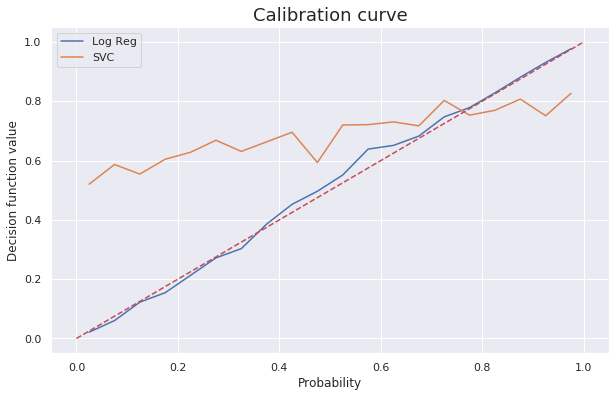

In [ ]:
figure(figsize=(10, 6))
plot_calibration_curve(y_test, y_pred_log[:, 1])
plot_calibration_curve(y_test, y_pred_svc)
plt.legend(["Log Reg", "SVC"])
plt.title("Сalibration curve", fontsize=18)
plt.xlabel("Decision function value")
plt.ylabel("Probability")
plt.plot([0, 1], [0, 1],'r--')

Text(0.5, 1.0, 'Log Reg dicision function dist.')

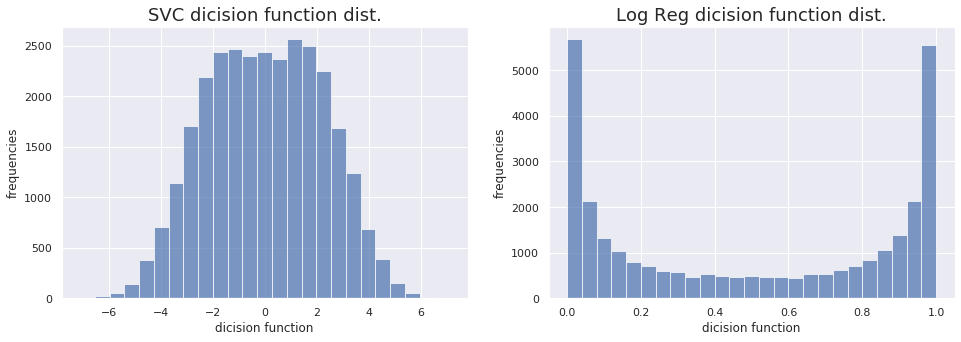

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
axes[0].hist(y_pred_svc, bins=25, alpha=0.7)
axes[0].set_xlabel('dicision function')
axes[0].set_ylabel('frequencies')
axes[0].set_title("SVC dicision function dist.", fontsize = 18)

axes[1].hist(y_pred_log[:, 1], bins=25, alpha=0.7)
axes[1].set_xlabel('dicision function')
axes[1].set_ylabel('frequencies')
axes[1].set_title("Log Reg dicision function dist.", fontsize = 18)

$Ответ:$ Значение функции решения для SVM пропорционально расстонию точки до разделяющей гиперплоскости, поэтому они сосредоточены вокруг нуля, так как объекты не сильно отдалены от неё. С другой стороны вероятность классов для логистической регрессии не пропорционально отражает расстояние до разделяющей гиперплоскости, а сигмойдную функцию, которая при близких к 0 значения быстро растёт с ростом расстояния.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
clf_cal = CalibratedClassifierCV(base_estimator=clf_svc, method='sigmoid', cv=3)
clf_cal.fit(X_train, y_train)
y_pred_cal = clf_cal.predict_proba(X_test)

In [ ]:
clf_cal_iso = CalibratedClassifierCV(base_estimator=clf_svc, method='isotonic', cv=3)
clf_cal_iso.fit(X_train, y_train)
y_pred_cal_iso = clf_cal_iso.predict_proba(X_test)

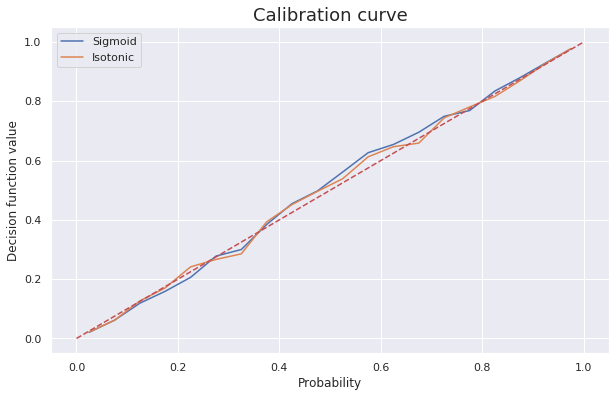

In [ ]:
figure(figsize=(10, 6))
plot_calibration_curve(y_test, y_pred_cal[:, 1])
plot_calibration_curve(y_test, y_pred_cal_iso[:, 1])
plt.legend(["Sigmoid", "Isotonic"])
plt.title("Сalibration curve", fontsize=18)
plt.xlabel("Probability")
plt.ylabel("Decision function value")
plt.plot([0, 1], [0, 1],'r--')

$Ответ:$ Да, улучшилась.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
 !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wolk1612","key":"61fefa4765225d0a755d3f3f858d6a12"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          11782  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           7008  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          12927  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           4307  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [ ]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [ ]:
data = pd.read_csv('/content/train/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

__Задание 3.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc_before_ohe = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC = 0.63


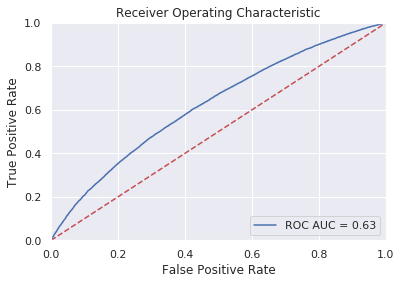

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict_log[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('ROC AUC = %0.2f' % roc_auc)

__Задание 4.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time

In [ ]:

cat = [c for c in data.columns if "cat" in c]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(categories='auto', handle_unknown="ignore"), cat)
])

ohe_X_train = column_transformer.fit_transform(x)
ohe_X_test = column_transformer.transform(X_test)

In [ ]:
start_time = time.time()
clf_log = LogisticRegression()
clf_log.fit(ohe_X_train, y_train)
y_predict_log = clf_log.predict_proba(ohe_X_test)
roc_auc_after_ohe = roc_auc_score(y_test, y_predict_log[:, 1])
print("%s" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2.870471715927124


In [ ]:
print("AUC before OneHotEncoding: %s" %(roc_auc_before_ohe), "AUC after OneHotEncoding: %s" %(roc_auc_after_ohe), sep="\n")

AUC before OneHotEncoding: 0.6250600854008652
AUC after OneHotEncoding: 0.6135875964356614


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(1.5 балла)__

In [ ]:
data1 = data.copy()
data1["target"] = target
for col in cat:
  data1[col] = data1[col].map(data1.groupby(col)['target'].mean())
data1 = data1.drop("target", axis=1)
tar_X_train, tar_X_test, y_train, y_test = train_test_split(data1, target, test_size=0.5)

In [ ]:
start_time = time.time()
clf_log = LogisticRegression()
clf_log.fit(tar_X_train, y_train)
y_predict_log = clf_log.predict_proba(tar_X_test)
roc_auc_cat_target = roc_auc_score(y_test, y_predict_log[:, 1])
print("%s" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


20.30852961540222


In [ ]:
print("AUC before OneHotEncoding: %s" %(roc_auc_before_ohe),
      "AUC after OneHotEncoding: %s" %(roc_auc_after_ohe),
      "AUC after TargetEncoding: %s" %(roc_auc_cat_target), sep="\n")

AUC before OneHotEncoding: 0.6250600854008652
AUC after OneHotEncoding: 0.6135875964356614
AUC after TargetEncoding: 0.6296337475241331


$Ответ:$ Время обучения увеличилось с 2.87 до 20.31 секунды, качество модели улучшилось. Возможно модель переобучается.

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(1 балл)__

In [ ]:
data2 = data1.copy()

In [ ]:
for col in cat:
  data2[col] = data1[col] + np.random.normal(scale = 0.1 * np.std(data1[col]), size=data1.shape[0])
rand_X_train, rand_X_test, y_train, y_test = train_test_split(data2, target, test_size=0.5)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(rand_X_train, y_train)
y_predict_log = clf_log.predict_proba(rand_X_test)
roc_auc_cat_rand = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print("AUC before OneHotEncoding: %s" %(roc_auc_before_ohe),
      "AUC after OneHotEncoding: %s" %(roc_auc_after_ohe),
      "AUC after TargetEncoding: %s" %(roc_auc_cat_target),
      "AUC after TargetEncoding and rand: %s" %(roc_auc_cat_rand), sep="\n")

AUC before OneHotEncoding: 0.6250600854008652
AUC after OneHotEncoding: 0.6135875964356614
AUC after TargetEncoding: 0.6296337475241331
AUC after TargetEncoding and rand: 0.6314759216590369


__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум).

__(+0.5 балла)__

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
data0 = data.copy()
data0["target"] = target
kf = KFold(n_splits=3)
for train_mask, test_mask in kf.split(data0):
  for col in cat:
    data0.iloc[test_mask][col] = data0.iloc[test_mask][col].map(
        data0.iloc[train_mask].groupby(col)['target'].mean())
for col in cat:
  data0[col] = data0[col] + np.random.normal(scale = 0.1 * np.std(data0[col]), size=data0.shape[0])
data0 = data0.drop("target", axis=1)
true_tar_X_train, true_tar_X_test, y_train, y_test = train_test_split(data0, target, test_size=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
clf_log = LogisticRegression()
clf_log.fit(true_tar_X_train, y_train)
y_predict_log = clf_log.predict_proba(true_tar_X_test)
roc_auc_cat_true_tar = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print("AUC after True TargetEncoding and rand: %s" %(roc_auc_cat_true_tar))

AUC after True TargetEncoding and rand: 0.625311267845445


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке.

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(1 балл)__

$Ответ:$ Значения, редко встречающейся категории будет подсматривать в решение и вести к переобучению, к тому же редкие переменные могут вообще не отражать дейстивтельность. Вполне возможно, что выборка по редкой категории не будет отражать генеральной совокупности.

In [ ]:
data3 = data.copy()
data3["target"] = target
C = 10
for col in cat:
  m = data3[col].map(data3.groupby(col)['target'].mean()).values
  c = data3[col].map(data3.groupby(col)['target'].count()).values
  data3[col] = (c * m + C * data3["target"]) / (C + c)
data3 = data3.drop("target", axis=1)
smoth_X_train, smoth_X_test, y_train, y_test = train_test_split(data3, target, test_size=0.5)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(smoth_X_train, y_train)
y_predict_log = clf_log.predict_proba(smoth_X_test)
roc_auc_cat_smoth = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print("AUC before OneHotEncoding: %s" %(roc_auc_before_ohe),
      "AUC after OneHotEncoding: %s" %(roc_auc_after_ohe),
      "AUC after TargetEncoding: %s" %(roc_auc_cat_target),
      "AUC after TargetEncoding and rand: %s" %(roc_auc_cat_rand),
      "AUC after Smoth TargetEncoding: %s" %(roc_auc_cat_smoth), sep="\n")

AUC before OneHotEncoding: 0.6250600854008652
AUC after OneHotEncoding: 0.6135875964356614
AUC after TargetEncoding: 0.6296337475241331
AUC after TargetEncoding and rand: 0.6314759216590369
AUC after Smoth TargetEncoding: 0.6426493892852909


__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ ...

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('/content/train/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [ ]:
data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
ohe = OneHotEncoder(categories='auto', sparse=False)
data = pd.concat([data, pd.DataFrame(data=ohe.fit_transform(data[cat]), columns=ohe.get_feature_names(cat), index=data.index)], axis=1).drop(cat, axis=1)

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print("", %roc_auc)

0.6323141315388041

In [ ]:
data.shape

(595212, 227)

$Ответ:$ Мы получили 227 переменных.

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
top_200_feat = [col for i, col in sorted(zip(abs(clf_log.coef_.reshape(-1,)), data.columns), reverse=True)[:200]]
X_train, X_test, y_train, y_test = train_test_split(data[top_200_feat], target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6387784206806024

$Ответ:$ Качество улучшилось, значит модель переобучалась на не информативных признаках.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), data.columns)
])

data1 = column_transformer.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6380823173515202

In [ ]:
scaled_top_200_feat = [col for i, col in sorted(zip(abs(clf_log.coef_.reshape(-1,)), data.columns), reverse=True)[:200]]

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), data[scaled_top_200_feat].columns)
])

data1 = column_transformer.fit_transform(data[scaled_top_200_feat])

X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6380229463954241

$Ответ:$ Качество не улучшилось. Если стандартизировать только числовые и порядковые признаки результат сильно хуже, чем при стардатизации всех, в том числе вновь полученных бинарных признаков.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

__(0.5 балла)__

In [ ]:
data.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin',
       ...
       'ps_car_11_cat_95', 'ps_car_11_cat_96', 'ps_car_11_cat_97',
       'ps_car_11_cat_98', 'ps_car_11_cat_99', 'ps_car_11_cat_100',
       'ps_car_11_cat_101', 'ps_car_11_cat_102', 'ps_car_11_cat_103',
       'ps_car_11_cat_104'],
      dtype='object', length=227)

In [ ]:
data.groupby(by="target")["ps_ind_01"].agg(["mean", "count", "var"])

1.8932134649653543

In [ ]:
start_time = time.time()
data["target"] = target
t = []
for col in data.columns:
  temp = data.groupby(by="target")[col].agg(["mean", "count", "var"])
  t.append(np.abs(temp["mean"][0] - temp["mean"][1])/(
      np.sqrt((temp["count"][0] * temp["var"][0] + temp["count"][1] * temp["var"][1]) / (
          temp["count"][0] + temp["count"][1] ))))
print("%s" % (time.time() - start_time))

5.367978096008301


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
t_stat_top_200_feat = [col for i, col in sorted(zip(t[:-1], data.columns[:-1]), reverse=True)[:200]]

In [ ]:
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train[t_stat_top_200_feat], y_train)
y_predict_log = clf_log.predict_proba(X_test[t_stat_top_200_feat])
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6388576559228146

### Методы-обёртки

__Задание 10.__

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
X_true_train, X_valid, y_true_train, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
start_time = time.time()

clf_log = LogisticRegression()
clf_log.fit(X_true_train.iloc[:, :-1], y_true_train)
y_predict_log = clf_log.predict_proba(X_valid.iloc[:, :-1])
roc_auc = roc_auc_score(y_valid, y_predict_log[:, 1])
roc_auc

print("%s" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


25.303340196609497


$Ответ:$ Одна итерация занимает порядка 20 секунд, что бы перебрать все возможне вариант $20 сек. * 227 колонок = 75 мин.$ В лучшем случае, если все первые можно будет отбросить, то $20 сек. * 27 колонок = 9 мин.$ Линейные модели быстро предсказывают, потому что достаточно умножить вектор весов на вектор признаков, основное время тратиться на обучение.

In [ ]:
X_true_train, X_valid, y_true_train, y_valid = train_test_split(X_train, y_train, train_size=10000, random_state=42)

In [ ]:
start_time = time.time()

clf_log = LogisticRegression()
clf_log.fit(X_true_train, y_true_train)
y_predict_log = clf_log.predict_proba(X_valid)
roc_auc_base0 = roc_auc_score(y_valid, y_predict_log[:, 1])

print("%s" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8362929821014404


$Ответ:$ На 10 тысячах объектах обучение происходит за 1.5 секунды, значит в случае, когда каждая переменная важна, то на перебор всех вариантов понадобится $1.5 сек. * 227 колонок = 5.5 мин.$ , что меньше, чем время потраченное на полных данных, даже в лучшем случае.

In [ ]:
start_time = time.time()
i = 0
roc_auc_base = roc_auc_base0

while (X_true_train.shape[1] > 200) and (i < 227):
  col = X_true_train.columns[i]
  clf_log = LogisticRegression()
  clf_log.fit(X_true_train.drop(col, axis=1), y_true_train)
  y_predict_log = clf_log.predict_proba(X_valid.drop(col, axis=1))
  roc_auc = roc_auc_score(y_valid, y_predict_log[:, 1])

  if roc_auc >= roc_auc_base:
    X_true_train = X_true_train.drop(col, axis=1)
    X_valid = X_valid.drop(col, axis=1)
    roc_auc_base = roc_auc
    print("Column %s was droped" %(col))

  i += 1

print("%s" % (time.time() - start_time))

In [ ]:
print("%s ROC AUC before selection" %roc_auc_base0,
      "%s ROC AUC after feature selection" %roc_auc_base, sep="\n")

0.578068901122059 ROC AUC before selection
0.5838734647987546 ROC AUC after feature selection


**Ответ:** Мы получили прирост метрики качества на валидационной выборке, но это может являться следствием переобучения, проверим результат отбора наших  признаков на отложенной выборке.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc_before = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc_before

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6380771288734163

In [ ]:
clf_log = LogisticRegression()
clf_log.fit(X_train[X_true_train.columns], y_train)
y_predict_log = clf_log.predict_proba(X_test[X_true_train.columns])
roc_auc_after = roc_auc_score(y_test, y_predict_log[:, 1])
roc_auc_after

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6372451890895858

**Ответ:** Качество модели ухудшилось, валидационная выборка сама по себе оказалась обучающей. Модель переобучилась.

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** результаты по качеству:

Базовый без обработки категореальных признаков: AUC  0.6250600854008652, не требует времени на предобработку, но категореальные признаки не упорядочены, поэтому теряем много информации предполагая обратное.

after OneHotEncoding: AUC 0.6380771288734163, не требует много времени (около 3 сек.), но сильно увеличивает размеры таблицы, а значит затраты памяти.

after TargetEncoding: AUC  0.6296337475241331, требует чуть больше времени, но позволяет не тратить лишней памяти, что очень полезно при большом количестве категорий, но переобучается.

after TargetEncoding and rand: AUC  0.6314759216590369, меньше переобучения благодаря некоторой случайности, не требует дополнительного, по сравнению с обычным TargetEncoding, времени.

after Smoth TargetEncoding:AUC  0.6426493892852909, сглаживание ещё сильнее повышает качество, не требует дополнительного времени, по сравнению с обычным TargetEncoding временем..

after feature selection according t-statistic:AUC  0.6388576559228146, занимает 5 секунд, убирает не информацивные признаки, на которых модель переобучается, положительно влияет на результат.

after random feature selection:AUC  0.6372451890895858, долго обучается на всей выборке, выборка меньшего размера из тренировочной позволяет ускорить процесс отбора признаков, но качество ухудшилось, на валидации случилось переобучение.

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку.

Воспользуемся той же самый задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты.

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000.

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('/content/train/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
target.mean()

0.036447517859182946

**Ответ:** Машины не так часто попадают в аварии, большинство водителей -- молодцы.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
ohe = OneHotEncoder(categories='auto', sparse=False)
data = pd.concat([data, pd.DataFrame(data=ohe.fit_transform(data[cat]), columns=ohe.get_feature_names(cat), index=data.index)], axis=1).drop(cat, axis=1)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
y_predict_log = clf_log.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_predict_log[:, 1])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
roc_auc

0.6380771288734163

**Ответ:** Отсечение стандартно происходит на 0.5 вероятности.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

PR AUC = 0.06


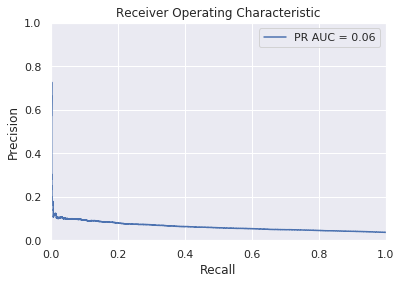

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_log[:, 1])
pr_auc = auc(recall, precision)
plt.title('Receiver Operating Characteristic')
plt.plot(recall, precision, 'b', label = 'PR AUC = %0.2f' % pr_auc)
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
print('PR AUC = %0.2f' % pr_auc)

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

**Ответ:** По определению требуется найти порог отсечения и $recall$ на уровне $precision = 0.95$

In [ ]:
recall[precision >=0.95][0]

0.0004628558204119417

In [ ]:
thresholds[precision[1:] >=0.95][0]

0.47256199983424124

In [ ]:
(y_predict_log[:, 1] >= thresholds[precision[1:] >=0.95][0]).mean()

2.520097779793856e-05

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился.

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный.

__(1 балл)__

In [ ]:
balance = []
for thres in thresholds:
    y_pred_true = np.where(y_predict_log[:, 1]>thres, 1, 0)
    balance.append(np.sum(5000 * y_pred_true - 100000 * y_test))

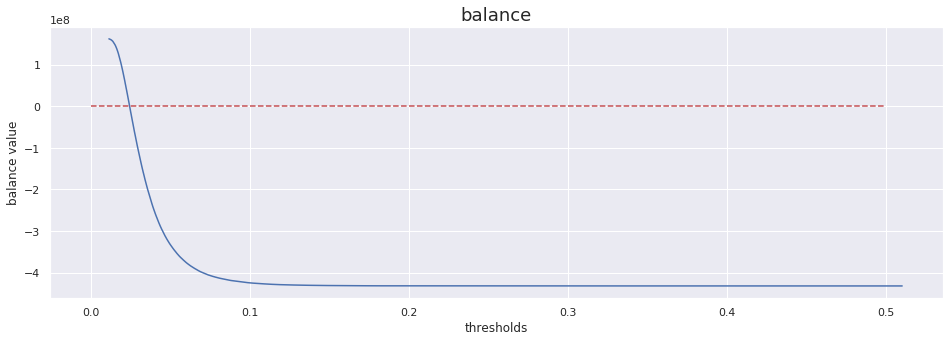

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (16, 5))
axes.plot(thresholds, balance)
axes.set_xlabel("thresholds")
axes.set_ylabel("balance value")
axes.set_title("balance", fontsize=18)
plt.plot([0, 0.5], [0, 0],'r--')

In [ ]:
print("отсечение для не отрицательного баланса : %s" %thresholds[np.equal(balance, 0)][0])

отсечение для не отрицательного баланса : 0.02459663839901703


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
print("отсечение для наибольшей разница: %s" %thresholds[np.argmax(balance, 0)])

отсечение для наибольшей разница: 0.011550707906313025


## Часть 3 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 13.__ Работа с vowpal wabbit.

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте.
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Занимательные фактов и возможностей vowpal-wabbit:
1) В нем можно обучать только линейные модели. При этом, увеличивать качество самих методов, как мы уже знаем можно за счет добавления новых признаков, подгонкой функции потерь, а также благодаря использованию низкоранговых разложений


2) Обучающая выборка обрабатывается с помощью стахостического оптимизатора, благодаря чему можно обучаться на выборках, которые не помещаются в память

3)Можно обрабатывать большое количество признаков за счет их хэширования (так называемый hashing trick), бладаря чему можно обучать модели даже в случаях, когда полный набор весов просто не помещается в памяти

4) Поддерживается режим активного обучения, при котором обьекты обучающей выборки можно подавать даже с нескольких машин по сети

5) Обучение может быть распараллелено на несколько машин


Источники:
https://habr.com/ru/company/mlclass/blog/248779/